<a href="https://colab.research.google.com/github/fnal-cpc/bootcamp/blob/master/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas: Python Data Analysis Library

Pandas is a toolkit built around the 'tables' package to help manipulate, read, write, and analyze large datasets

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np

from pylab import *

## The Series Structure

Series is meant to help organize time or other stream data, and can handle both regularly and irregularly sampled data. A nice feature people use is its built-in support for timestamps, which can be read in and used directly from a datafile without the need to translate. Here's an example of a time-dependent trend with lots of noise added

count    1000.000000
mean       -0.011977
std         1.255895
min        -3.352429
25%        -0.906763
50%         0.026917
75%         0.842357
max         4.917346
dtype: float64


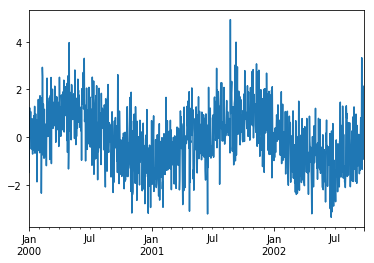

In [28]:
s = pd.Series(np.random.randn(1000)+np.sin(np.arange(0,2,2e-3)*2*pi), index=pd.date_range('1/1/2000', periods=1000))
s.plot()
print s.describe()

We can use the series object to do quick time-domain analyses, similar to what we can do with matplotlib but handled internally and self-consistently. The windowing (rolling) function are particularly useful.

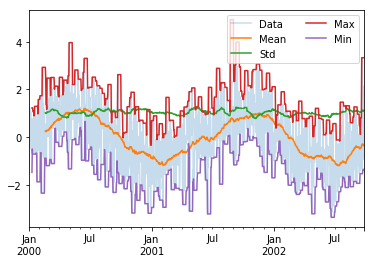

In [29]:
s.plot(alpha=0.25,label='Data')
r = s.rolling(50).mean()
v= s.rolling(50).std()
ma = s.rolling(10).max()
mi = s.rolling(10).min()
r.plot(label='Mean')
v.plot(label='Std')
ma.plot(label='Max')
mi.plot(label='Min')
legend(ncol=2)
show()

Indexing and restricting the range can also be handled easily for a series, the same way one would do it for a numpy array

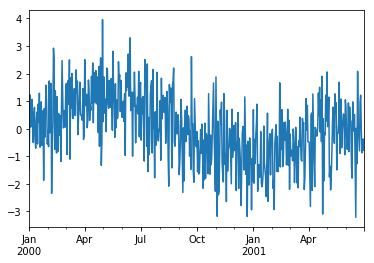

-1.4710352787366192 -2.9325758164113402 -0.46866369369049543


In [30]:
sy=s['2000-01':'2001-06']
sy.plot()
show()

print sy[0],sy[400],sy['2001-04-01']

### Irregular Sampling

Here's an example of scatter points to which we can add. We have 6 points originally, and add two more, then sort the index so that they're plotted sequentially.

Note that for a series object, no two points can have the same index; if you want true scatter data, we'll have to use a different structure that we'll see shortly.

Int64Index([0, 10, 11, 12, 42, 60], dtype='int64')
Int64Index([0, 10, 11, 12, 42, 60, 1, -5], dtype='int64')
Int64Index([-5, 0, 1, 10, 11, 12, 42, 60], dtype='int64')
-5     20
 0      1
 1      0
 10     2
 11     3
 12     4
 42     5
 60     6
dtype: int64


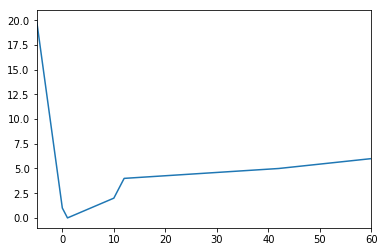

In [31]:
sIrr = pd.Series([1,2,3,4,5,6],index=[0,10,11,12,42,60])
print sIrr.index

sIrr[1]=0
sIrr[-5]=20
print sIrr.index

sIrrSorted=sIrr.sort_index()
print sIrrSorted.index
print sIrrSorted

sIrrSorted.plot()
show()

## The DataFrame Structure

What if we have multiple time-series data? How about an array with simple indices, where maybe we have uncorrelated x and y values? We need a dataframe, which is analogous to a numpy recarray.

In this example, I have two series objects with different underlying signals that I call 'A' and 'B'.

In [32]:
sA = pd.Series(np.random.randn(1000)+np.sin(np.arange(0,2,2e-3)*0.5*2*pi), index=pd.date_range('1/1/2010', periods=1000))
sB = pd.Series(np.random.randn(1000)+np.sin(np.arange(0,2,2e-3)*100*2*pi), index=pd.date_range('1/1/2010', periods=1000))

d = pd.DataFrame({'A':sA,'B':sB})
d.head()

,A,B
2010-01-01,-0.103194,0.016269
2010-01-02,0.740548,0.383963
2010-01-03,-0.090227,1.121261
2010-01-04,-0.103155,0.048437
2010-01-05,-0.617984,-2.586642


Note that the index here is the same as the index for the Series objects. They happened to be the same; we'll see shortly what happens when they're not the same. Below, we can index normally, and we see one way to access a column. We can also use dataframes to plot without resorting to for loops!

                   A         B
2010-01-09 -0.380351  0.069661
2010-01-10 -0.065276 -1.255418
-0.38035138904064836


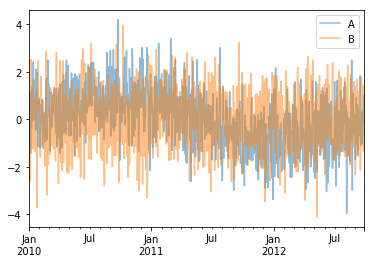

In [33]:
print d['20100109':'20100110']
print d.A['20100109']

d.plot(alpha=0.5)
show()

Suppose we have data from two different instruments with different time ranges. One gives us just A and B, and one includes an additional failsage flag. This new dataframe might look like the following

In [34]:
sANew = pd.Series(np.random.randn(3000)+np.sin(np.arange(0,6,2e-3)*0.5*2*pi), index=pd.date_range('1/1/2015', periods=3000))
sBNew = pd.Series(np.random.randn(3000)+np.sin(np.arange(0,6,2e-3)*50*2*pi), index=pd.date_range('1/1/2015', periods=3000))
sCNew = pd.Series(np.random.randn(3000) > 0.5, index=pd.date_range('1/1/2015', periods=3000))

dNew = pd.DataFrame({'A':sANew,'B':sBNew,'C':sCNew})

dNew.head()

,A,B,C
2015-01-01,0.129286,-0.934756,False
2015-01-02,0.102131,2.106844,False
2015-01-03,-0.037022,3.385331,False
2015-01-04,0.958356,-2.170571,False
2015-01-05,-0.909193,1.243577,False


Here we concatenate the new dataframes to make a new dataframe object; we see we have a new column with 'NaN' where C didn't previously exist. This also retained the original timestamps!

In [35]:
dTot=pd.concat([d,dNew],sort=False)
dTot.head()

,A,B,C
2010-01-01,-0.103194,0.016269,NaN
2010-01-02,0.740548,0.383963,NaN
2010-01-03,-0.090227,1.121261,NaN
2010-01-04,-0.103155,0.048437,NaN
2010-01-05,-0.617984,-2.586642,NaN


We can use the 'dropna' function to get back only the rows or columns without the nans. Here we do it for the rows, next we do it for the columns (to get rid of C, which is redundant). We also see that we can get the trues and falses individually using the groupby command

In [36]:
dValid=dTot.dropna(axis=0)
g=dValid.groupby('C')
print len(dTot),len(dValid),len(g.get_group(1)),len(g.get_group(0))
dValid.head()

4000 3000 921 2079


,A,B,C
2015-01-01,0.129286,-0.934756,False
2015-01-02,0.102131,2.106844,False
2015-01-03,-0.037022,3.385331,False
2015-01-04,0.958356,-2.170571,False
2015-01-05,-0.909193,1.243577,False


In [37]:
dClean=dTot.dropna(axis=1)
dClean.head()

,A,B
2010-01-01,-0.103194,0.016269
2010-01-02,0.740548,0.383963
2010-01-03,-0.090227,1.121261
2010-01-04,-0.103155,0.048437
2010-01-05,-0.617984,-2.586642


If we don't drop columns with Nan, the dataframe will just ignore those columns when it needs values for all rows (e.g for plotting). Here is an example of a scatter plot, where you can see the time gap.

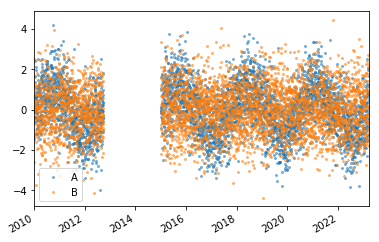

In [38]:
dTot.plot(marker='o',linestyle='',markersize=2,alpha=0.5)
show()

### Using Dataframes to Construct New Variables

Here I'm going to make some fake data (it looks like some delta pulses in time-stream data) which might be gamma ray signals or dark matter events. The backgrounds are not coincident between these two channels, for whatever reason, and the foreground is mono-energetic and shared equally between channels. I will end up with a dataframe containing 1000 traces, readout for both A and B, and the truth information about whether the event is a good event or pileup.

In [39]:
#create fake data
def signal(x,tau1,tau2,x0=500):
    dx=x-x0
    y=exp(-dx/tau1)/tau1-exp(-dx/tau2)/tau2
    y[dx<0]=0.0
    return y
 
def noisySignal(x,tau1,tau2,rms,x0=500):
    noise=np.random.normal(size=len(x),scale=rms)
    return signal(x,tau1,tau2,x0=x0)*2.0+noise
 
def noisyPileup(x,tau1,tau2,rms,nEvents,bad=False):
   
    noise=np.random.normal(size=len(x),scale=rms)
    x0=np.random.rand()*max(x)
    sig=signal(x,tau1,tau2,x0=x0)
   
    for i in range (1,nEvents):
        if(bad):
            x0+=50
        else:
            x0=np.random.rand()*max(x)
        amp=np.random.rand()*10
        sig+=signal(x,tau1,tau2,x0=x0)*amp
       
    sig+=noise
 
    return sig

cA=list()
cB=list()
truth=list()

x=np.arange(0,2000)

for i in range(0,1000):
    
    bad=np.random.rand()>0.1

    if(bad):
        chanA=np.random.rand()>0.5
        nEvents=(6-np.ceil(5*np.sqrt(np.random.uniform()))).astype(np.int)
        
        pileup=noisyPileup(x,1000,10,0.01,nEvents)
        noise=np.random.normal(size=len(x),scale=0.01)
        
        if(chanA):
            cA.append(pd.Series(pileup,index=x))
            cB.append(pd.Series(noise,index=x))
        else:
            cA.append(pd.Series(noise,index=x))
            cB.append(pd.Series(pileup,index=x))
    else:
        cA.append(pd.Series(noisySignal(x,1000,10,0.01),index=x))
        cB.append(pd.Series(noisySignal(x,1000,10,0.01),index=x))
    truth.append(not bad)
    
data=pd.DataFrame({'A':cA,'B':cB,'GoodEvent':truth})
data.head()

,A,B,GoodEvent
0,0 0.013413 1 -0.000034 2 -0.00...,0 -0.018485 1 0.002857 2 0.02...,False
1,0 0.004003 1 -0.014134 2 0.00...,0 -0.002901 1 -0.008736 2 -0.01...,False
2,0 -0.014050 1 -0.009849 2 -0.00...,0 -0.011761 1 -0.001119 2 -0.02...,False
3,0 0.000844 1 -0.004067 2 0.00...,0 -0.002337 1 0.011165 2 0.00...,False
4,0 0.011902 1 0.001832 2 -0.00...,0 -0.003208 1 -0.006093 2 0.01...,False


Here I'm plotting a selection of single events in one channel; these are random, so I have no idea whether they are good or not. 

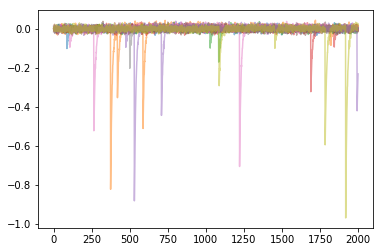

In [40]:
data['A'][0:9].apply(plot,alpha=0.5)
show()

I can also plot a single event for both channels equally easily

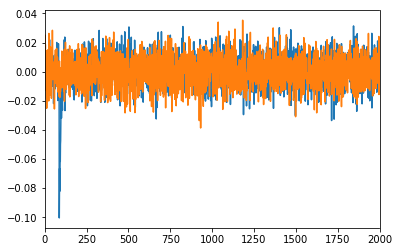

In [41]:
data['A'][0].plot()
data['B'][0].plot()

Here I use the 'goodEvent' variable to select good versus bad events

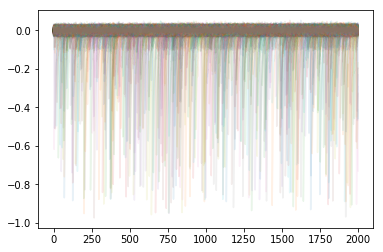

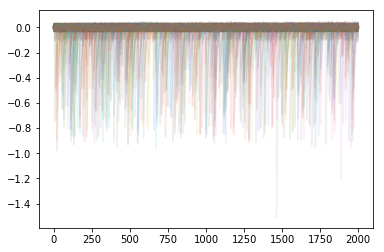

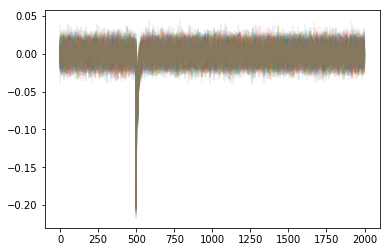

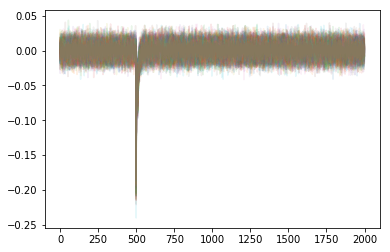

In [42]:
data.head()

g=data.groupby('GoodEvent')
for i in range(0,len(g)):
    for col in ['A','B']:
        g.get_group(i)[col].apply(plot,alpha=0.1)
        show()

,A,B,GoodEvent,Max_A,Min_A,Range_A,Max_B,Min_B,Range_B
0,0 0.013413 1 -0.000034 2 -0.00...,0 -0.018485 1 0.002857 2 0.02...,False,0.031421,-0.100511,0.131932,0.035345,-0.038694,0.074039
1,0 0.004003 1 -0.014134 2 0.00...,0 -0.002901 1 -0.008736 2 -0.01...,False,0.044435,-0.822266,0.866701,0.042390,-0.032772,0.075162
2,0 -0.014050 1 -0.009849 2 -0.00...,0 -0.011761 1 -0.001119 2 -0.02...,False,0.037495,-0.169969,0.207463,0.031285,-0.034265,0.065549
3,0 0.000844 1 -0.004067 2 0.00...,0 -0.002337 1 0.011165 2 0.00...,False,0.035468,-0.321783,0.357251,0.033258,-0.031846,0.065104
4,0 0.011902 1 0.001832 2 -0.00...,0 -0.003208 1 -0.006093 2 0.01...,False,0.039407,-0.881538,0.920945,0.041042,-0.033978,0.075020


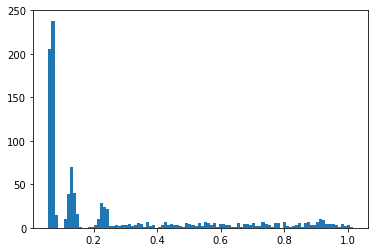

In [43]:
for chan in ['A','B']:
    data['Max_'+chan]=data[chan].map(np.max)
    data['Min_'+chan]=data[chan].map(np.min)
    data['Range_'+chan]=data['Max_'+chan]-data['Min_'+chan]

hist(data['Range_A'],bins=100)

data.head()

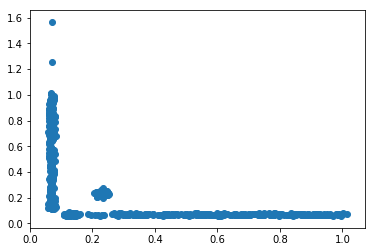

In [44]:
scatter(data['Range_A'],data['Range_B'])

,A,B,GoodEvent,Max_A,Min_A,Range_A,Max_B,Min_B,Range_B
7,0 0.002775 1 0.004716 2 0.00...,0 -0.008136 1 -0.009070 2 0.01...,True,0.032952,-0.201819,0.234770,0.030232,-0.165913,0.196145
13,0 0.025526 1 -0.002913 2 0.01...,0 -0.007015 1 -0.009111 2 0.01...,True,0.042931,-0.206035,0.248966,0.033320,-0.203314,0.236634
17,0 -0.013740 1 0.000695 2 0.00...,0 0.009085 1 -0.000055 2 0.00...,True,0.037845,-0.203346,0.241192,0.033200,-0.186896,0.220096
28,0 -0.000338 1 -0.006791 2 0.00...,0 0.003204 1 -0.005706 2 -0.00...,True,0.034206,-0.192856,0.227062,0.035172,-0.186659,0.221831
30,0 0.005520 1 -0.004126 2 0.00...,0 0.008965 1 -0.002293 2 0.00...,True,0.034359,-0.202255,0.236614,0.039014,-0.185778,0.224792


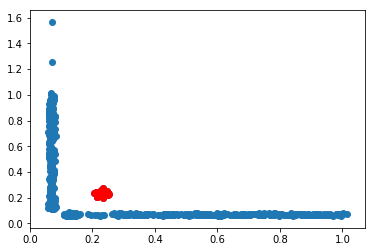

In [45]:
dataGood=data[(data['Range_A']>0.1) & (data['Range_B']>0.1)]

scatter(data['Range_A'],data['Range_B'])
scatter(dataGood['Range_A'],dataGood['Range_B'],color='red')

dataGood.head()

## MultiIndex

The above example is great, but having to combine strings and remember the naming scheme is a pain and not very good practice. Multiindices (indexing by pairs or tuples) solve this problem. Note that the Panel class was mean to do this, but that is now deprecated in favor or multiindex

For example, we can build an array with a multi-index to include column categories with variables grouped by channel

In [46]:
data=pd.DataFrame({('A','trace'):cA,('B','trace'):cB,('Event','GoodEvent'):truth})
for chan in ['A','B']:
    data[chan,'Max']=data[chan]['trace'].map(np.max)
    data[chan,'Min']=data[chan]['trace'].map(np.min)
    data[chan,'Range']=data[chan,'Max']-data[chan,'Min']

data.head()

A  ...         B
                                               trace  ...     Range
0  0       0.013413
1      -0.000034
2      -0.00...  ...  0.074039
1  0       0.004003
1      -0.014134
2       0.00...  ...  0.075162
2  0      -0.014050
1      -0.009849
2      -0.00...  ...  0.065549
3  0       0.000844
1      -0.004067
2       0.00...  ...  0.065104
4  0       0.011902
1       0.001832
2      -0.00...  ...  0.075020

[5 rows x 9 columns]

This is great, but now the multi-index is disorganized. We can easily organize any index (on any level) using the sortindex and sortlevel functions

In [47]:
data=data.sort_index(axis=1)
data.head()

A  ...     Event
        Max  ... GoodEvent
0  0.031421  ...     False
1  0.044435  ...     False
2  0.037495  ...     False
3  0.035468  ...     False
4  0.039407  ...     False

[5 rows x 9 columns]

## Saving data
Pandas has many helpful writers that quickly write any structure to many formats of data (CSV, HDF5, etc.) (see full list at: http://pandas.pydata.org/pandas-docs/version/0.20/io.html)

## Reading in data
Pandas also has many helpful readers that quickly read in many formats of data (CSV, HDF5, etc.) into a DataFrame (see above link). If you create a 'data.txt' file you can try to run these cells to play around with importing data

In [0]:
data = pd.read_csv('data.txt',delimiter=' ',skiprows=0,header=None)
data.head(5)

In [0]:
data = pd.read_csv('data.txt',delimiter=' ',skiprows=0
                   ,names=[160,135,126,117,109,100,90,82,73,63,54,46,-160,-150,-140,-130,-120,-110,-100,-90])
data.head(5)

In [0]:
data.sort_index(inplace=True,axis=1)
data=data[175:]
data.describe()

In [0]:
data.hist(figsize=(12,10),bins=100,log=True)
tight_layout()
show()